`NLP Lab 1`

`By : Mahmoud Ahmed Shawqi`

**Dataset**
labeled datasset collected from twitter (Lab 1 - Hate Speech.tsv)

**Objective**
classify tweets containing hate speech from other tweets. <br>
0 -> no hate speech <br>
1 -> contains hate speech <br>

**Total Estimated Time = 90-120 Mins**

**Evaluation metric**
macro f1 score

### Import used libraries

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

### Load Dataset

###### Note: search how to load the data from tsv file

In [55]:
df = pd.read_csv("Lab 1 - Hate Speech.tsv", sep= "\t")
df.head(100)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


# Imbalanced data

### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [56]:
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(df["tweet"],
                                                    df["label"],
                                                    test_size=0.2,
                                                    stratify=df["label"],
                                                    random_state=42)

### EDA on training data

- check NaNs

In [57]:
train = pd.concat((X_train, y_train), axis=1)
train.isna().sum()

tweet    0
label    0
dtype: int64

In [58]:
ser = train['tweet'].apply(lambda x: len(x.split()))
ser.describe()


count    25228.000000
mean        13.405304
std         19.384400
min          1.000000
25%          9.000000
50%         13.000000
75%         17.000000
max       2607.000000
Name: tweet, dtype: float64

<Axes: ylabel='tweet'>

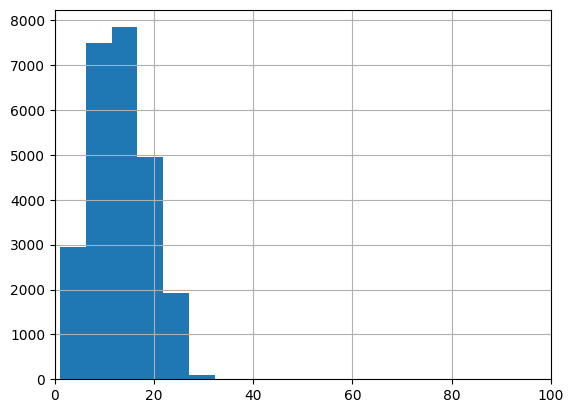

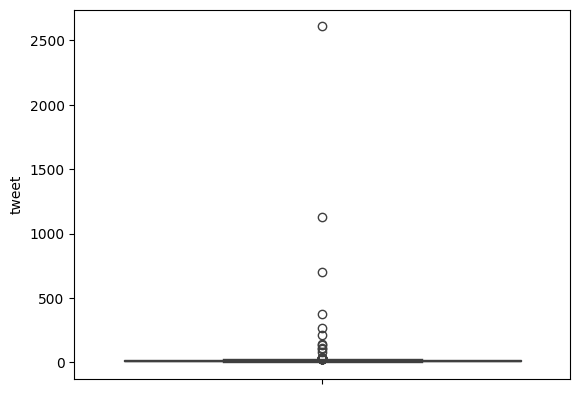

In [59]:
plt.figure()
ser.hist(bins=500)
plt.xlim(0,100)
plt.figure()
sns.boxplot(ser)

In [60]:
train['tweet_length'] = train['tweet'].apply(lambda x: len(x.split()))

train = train[train['tweet_length'] <= 40]

train.drop(columns="tweet_length", inplace=True)

<ipython-input-60-fe1933e57feb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns="tweet_length", inplace=True)


- check duplicates

<Axes: >

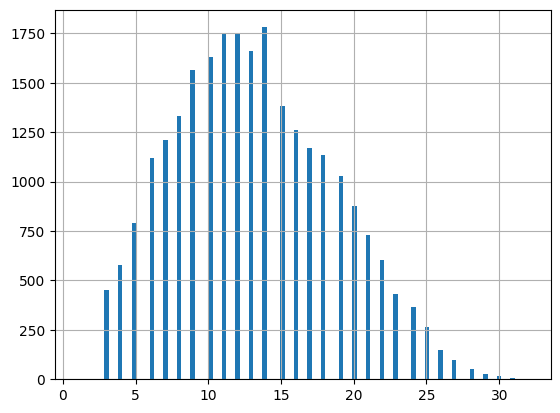

In [63]:
ser = train['tweet'].apply(lambda x: len(x.split()))
plt.figure()
ser.hist(bins=100)

In [64]:
train.duplicated().sum()

1794

In [65]:
train.drop_duplicates(inplace=True)

- show a representative sample of data texts to find out required preprocessing steps

In [66]:
train[:100]

,tweet,label
9289,"@user @user would like to wish you a #father's day :), #family #dad #fathersday",0
17259,always enjoy life! and be grateful for what you have #mondaymotivation #2016,0
437,"kayak, sup, snorkel, swim...whatever your pleasure, we'll put it together! #alohabeachbus #hawaii #explore",0
21546,@user what do you think of #alexjones saying #draintheswamp? #populationcontrol you had good videos with him. they got him.,1
15968,well i guess i can't join servers mcpe 15.0. #mcpe #mcpc #weird,0
12280,trumps associates are a classy bunch.,1
4920,now playing #intwine - on classic rock attic,0
447,"if lewis remains perfect, the rangers announcers are gonna stroke out.",0
2297,cool treat on a hot hot day ð§ #widn #frozenyogu tuesday #dclife #summer #gogreenâ¦,0
635,actually ordered a kylie lip kit,0


- check dataset balancing

In [67]:
df["label"].value_counts()

label
0    29322
1     2213
Name: count, dtype: int64

- Cleaning and Preprocessing are:
    - 1
    - 2
    - 3
    - ... etc.

In [32]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.0 MB/s eta 0:00:00


In [92]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 2.9 MB/s eta 0:00:00


In [93]:
import nltk
import re
import emoji
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import contractions
import string
from nltk import pos_tag
from nltk.corpus import stopwords



In [78]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
stops = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# `Example :`

In [108]:
def clean_txt(text):
    text = text.lower()
    text = re.sub('[*?!#@]', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = emoji.demojize(text)
    text = text.split()
    text = [word for word in text if word not in stops]
    text = [word for word in text if len(word)>=3]
    text = [lemmatizer.lemmatize(word, pos='v') for word in text]
    text = [stemmer.stem(word) for word in text]
    return ' '.join(text)

In [109]:
for i in range(10) :
  text = train['tweet'].iloc[i]
  print(text)

  clean_text = clean_txt(text)
  print(clean_text)
  print("_" * 120)

 @user @user would like to wish you a   #father's day :),  #family #dad #fathersday 
user user would like wish father' day :), famili dad fathersday
________________________________________________________________________________________________________________________
always enjoy life! and be grateful for what you have #mondaymotivation #2016
alway enjoy life grate mondaymotiv 2016
________________________________________________________________________________________________________________________
kayak, sup, snorkel, swim...whatever your pleasure, we'll put it together!  #alohabeachbus   #hawaii #explore 
kayak, sup, snorkel, swim...whatev pleasure, we'll put togeth alohabeachbu hawaii explor
________________________________________________________________________________________________________________________
@user what do you think of #alexjones saying #draintheswamp? #populationcontrol  you had good videos with him. they got him.
user think alexjon say draintheswamp populatio

### Cleaning and Preprocessing

#### Extra: use custom scikit-learn Transformers

Using custom transformers in scikit-learn provides flexibility, reusability, and control over the data transformation process, allowing you to seamlessly integrate with scikit-learn's pipelines, enabling you to combine multiple preprocessing steps and modeling into a single workflow. This makes your code more modular, readable, and easier to maintain.

##### link: https://www.andrewvillazon.com/custom-scikit-learn-transformers/

#### Example usage:

In [117]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stops = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()
        # Add any initialization code here

    def fit(self, X, y=None):
        # Add code for fitting the transformer here
        return self

    def transform(self, X):
        transformed_X = X.copy()
        transformed_X = X.apply(self.clean_txt)
        return transformed_X

    def clean_txt(self, text):
        text = text.lower()
        text = re.sub('[*?!#@]', '', text)
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
        text = emoji.demojize(text)
        text = text.split()
        text = [word for word in text if word not in self.stops]
        text = [word for word in text if len(word) >= 3]
        text = [self.lemmatizer.lemmatize(word, pos='v') for word in text]
        text = [self.stemmer.stem(word) for word in text]
        return ' '.join(text)

    def fit_transform(self, X, y=None):
        # This function combines fit and transform
        self.fit(X, y)
        return self.transform(X)

**You  are doing Great so far!**

### Modelling

#### Extra: use scikit-learn pipline

##### link: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

Using pipelines in scikit-learn promotes better code organization, reproducibility, and efficiency in machine learning workflows.

#### Example usage:

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
count_vectorizer = CountVectorizer(max_features=10000)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', count_vectorizer),
    ('model', model),
])
# Now you can use the pipeline for training and prediction
# pipeline.fit(X_train, y_train)
# pipeline.predict(X_test)

In [134]:
from sklearn.metrics import classification_report

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5864
           1       0.90      0.50      0.64       443

    accuracy                           0.96      6307
   macro avg       0.93      0.75      0.81      6307
weighted avg       0.96      0.96      0.96      6307



#### Evaluation

**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

In [135]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5864
           1       0.90      0.50      0.64       443

    accuracy                           0.96      6307
   macro avg       0.93      0.75      0.81      6307
weighted avg       0.96      0.96      0.96      6307



### Enhancement

- Using different N-grams
- Using different text representation technique
- Hyperparameter tuning

In [137]:
model = LogisticRegression()
count_vectorizer = CountVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 3))

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', count_vectorizer),
    ('model', model),
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5864
           1       0.88      0.49      0.63       443

    accuracy                           0.96      6307
   macro avg       0.92      0.74      0.81      6307
weighted avg       0.96      0.96      0.95      6307



In [143]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', tfidf_vectorizer),
    ('model', model),
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5864
           1       0.92      0.27      0.42       443

    accuracy                           0.95      6307
   macro avg       0.94      0.63      0.69      6307
weighted avg       0.95      0.95      0.93      6307



In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

C = [0.1, 1, 10, 100, 1000]

for c in C:
    model = LogisticRegression(C=c)
    count_vectorizer = CountVectorizer(max_features=10000, stop_words='english', ngram_range=(1, 3))

    # Create the pipeline
    pipeline = Pipeline(steps=[
        ('preprocessing', CustomTransformer()),
        ('Vectorizing', count_vectorizer),
        ('model', model),
    ])

    print(f"For C = {c} : ")
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred)

    print(report)
    print("_" * 120)




For C = 0.1 : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5864
           1       0.94      0.30      0.45       443

    accuracy                           0.95      6307
   macro avg       0.94      0.65      0.71      6307
weighted avg       0.95      0.95      0.94      6307

________________________________________________________________________________________________________________________
For C = 1 : 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5864
           1       0.88      0.49      0.63       443

    accuracy                           0.96      6307
   macro avg       0.92      0.74      0.81      6307
weighted avg       0.96      0.96      0.95      6307

________________________________________________________________________________________________________________________
For C = 10 : 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5864
           1       0.78      0.58      0.67       443

    accuracy                           0.96      6307
   macro avg       0.87      0.79      0.82      6307
weighted avg       0.96      0.96      0.96      6307

________________________________________________________________________________________________________________________
For C = 100 : 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5864
           1       0.68      0.64      0.66       443

    accuracy                           0.95      6307
   macro avg       0.83      0.81      0.82      6307
weighted avg       0.95      0.95      0.95      6307

________________________________________________________________________________________________________________________
For C = 1000 : 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5864
           1       0.65      0.65      0.65       443

    accuracy                           0.95      6307
   macro avg       0.81      0.81      0.81      6307
weighted avg       0.95      0.95      0.95      6307

________________________________________________________________________________________________________________________


### Conclusion and final results


#### Done!